> **Summary:** This section contains examples of different types of loss functions that can be used in either a regression or classification setting. It helps you understand some of the difference between the loss functions and how these differences give rise to different behavior on the part of a trained model (in this case a linear model).

Thus far we have been discussing Linear Models in their most familiar context --- minimizing the Mean Squared Error (MSE) with respect to the training data, optionally with an L2 regularization on the weight vector:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^N (y_i - \mathbf{w}^T \mathbf{x}_i)^2 + \alpha ||\mathbf{w}||_2^2
$$

For now, let us ignore the regularization term, and just focus on the Loss term. Why should we minimize the squared error?^[It turns out that there are good theoretical reasons for this, for example, that a Linear Model trained via an L2/MSE Loss is the Best Linear Unbiased Estimate (BLUE) of the Linear Model, according to the [Gauss-Markov Theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem), but, as we will see, there are other reasons to forgo these advantages.] Why not the absolute error or other possible loss functions? Let's explore a few of those options and then see, in practice, how they affect the learned linear model.


In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import seaborn as sns
sns.set_context('poster')

## Loss Functions for Regression

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss

def modified_huber_loss(y):
    if(abs(y)<1):
        return y**2
    else:
        return 2*abs(y)-1
mhuber = np.vectorize(modified_huber_loss)

eps = 0.7
def sq_esp_insensitive(y):
    if(abs(y)<eps):
        return 0
    else:
        return (abs(y)-eps)**2
sq_eps_ins = np.vectorize(sq_esp_insensitive)

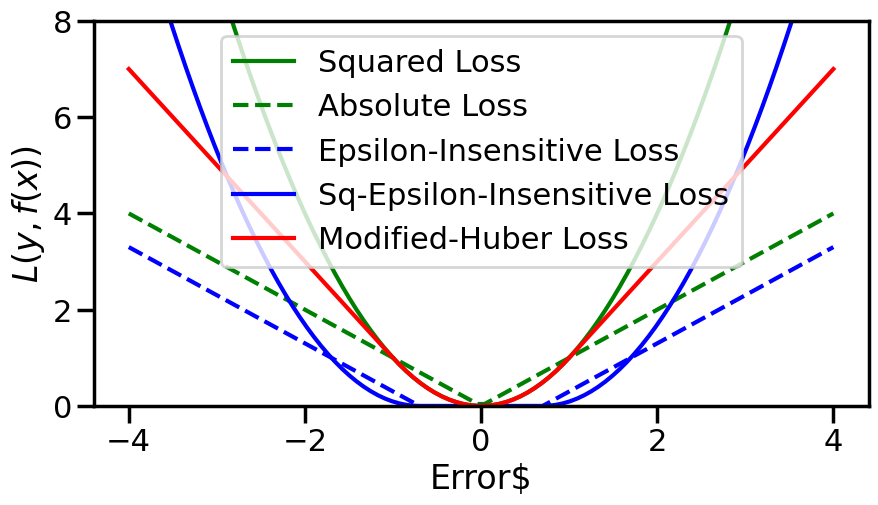

In [13]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)

plt.figure(figsize=(10,5))
plt.plot(xx, xx**2, 'g-',
         label="Squared Loss")
plt.plot(xx, abs(xx), 'g--',
         label="Absolute Loss")

plt.plot(xx, abs(xx)-eps, 'b--',
         label="Epsilon-Insensitive Loss")

plt.plot(xx, sq_eps_ins(xx), 'b-',
         label="Sq-Epsilon-Insensitive Loss")
plt.plot(xx, mhuber(xx), 'r-',
         label="Modified-Huber Loss")

plt.ylim((0, 8))
plt.legend(loc="upper center")
plt.xlabel("Error$")
plt.ylabel("$L(y, f(x))$")
plt.show()

# Outliers

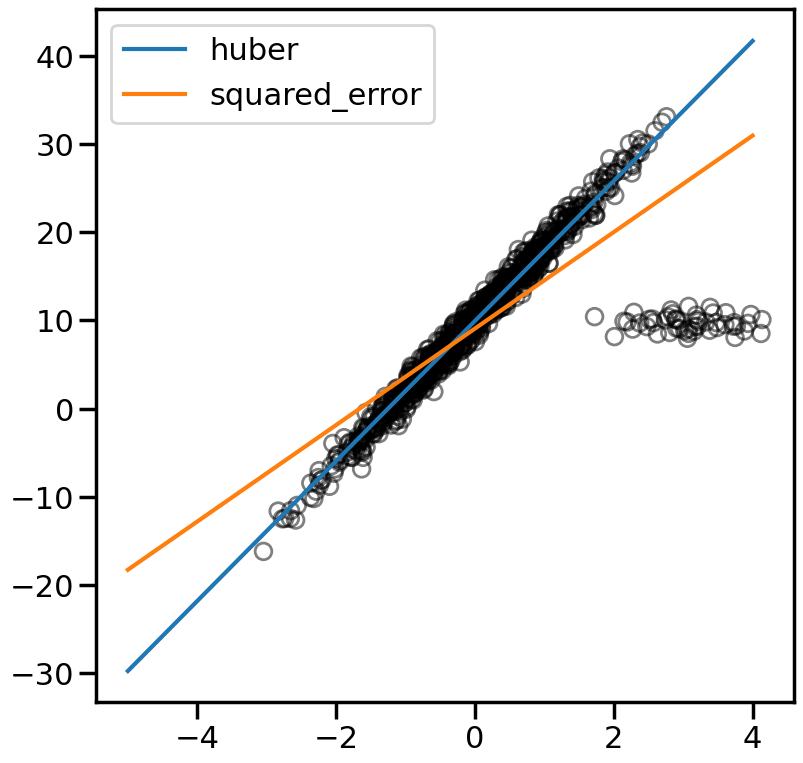

In [14]:
# Check out Outliers
from sklearn.datasets import make_regression
n_samples = 1000
n_outliers = 50

Xr, yr, coef = make_regression(n_samples=n_samples, n_features=1,
                              n_informative=1, noise=10,
                              coef=True, random_state=0)
# Add outlier data
np.random.seed(0)
Xr[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
yr[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
yr/=10
yr += 10

line_X = np.arange(-5, 5)
figure = plt.figure(figsize=(9, 9))

plt.scatter(Xr, yr,facecolors='None',edgecolors='k',alpha=0.5)

# Loss Options: huber, squared_error, epsilon_insensitive, squared_epsilon_insensitive
losses = ['huber', 'squared_error']
for loss in losses:
    model = SGDRegressor(loss=loss, fit_intercept=True, max_iter = 2000,
                     penalty='l2', alpha=.001, epsilon=1, tol=1e-3)
    model.fit(Xr, yr)

    # Predict data of estimated models
    line_y = model.predict(line_X[:, np.newaxis])
    plt.plot(line_X, line_y, '-', label=loss,alpha=1)

plt.axis('tight')
plt.legend(loc='best')
plt.show()

# Classification

## Logistic Regression

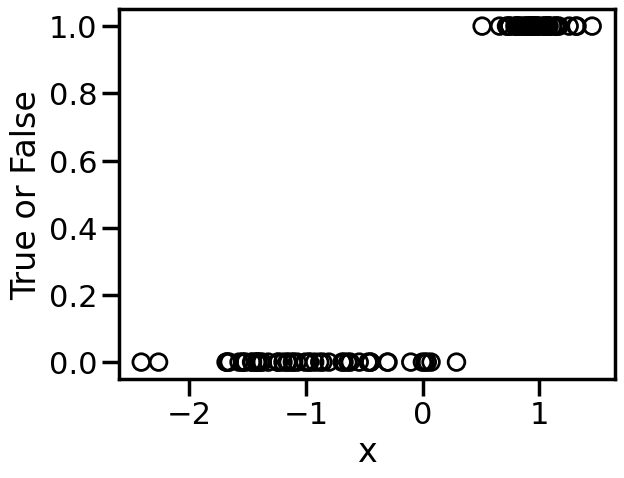

In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, n_redundant=0, 
                           n_informative=1,
                           random_state=1,
                           n_clusters_per_class=1,
                           flip_y=0.0, class_sep=1)
plt.figure()
plt.xlabel('x')
plt.ylabel('True or False')
plt.scatter(X,y,marker='o',facecolors='none',edgecolors='k')
plt.show()

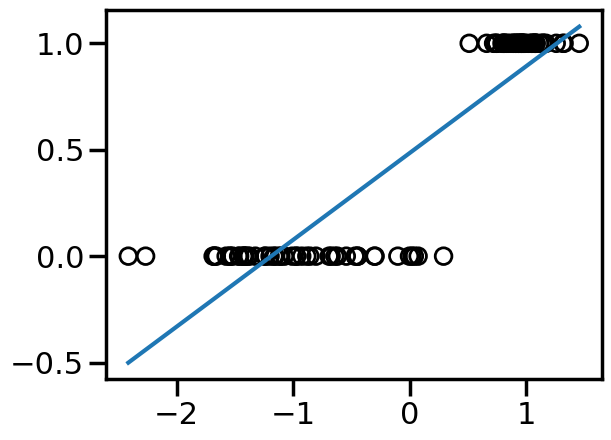

In [16]:
model = SGDRegressor(loss='squared_error', fit_intercept=True, max_iter = 2000,
                     penalty='l2', alpha=.001, epsilon=1, tol=1e-3)
model.fit(X, y)
Xp = np.linspace(X.min(),X.max(),100)
Xp = Xp[:, np.newaxis]
plt.figure()
plt.scatter(X,y,marker='o',facecolors='none',edgecolors='k')
plt.plot(Xp,model.predict(Xp))
plt.show()


## Classification Loss Functions

For many linear classification problems, we can use a decision function:
$$
y_i\cdot(w\cdot x_i)
$$
where $y_i = \pm 1$ such that if $y_i$ and $w\cdot x_i$ point have similar signs, then the decision function is positive, otherwise it is negative.

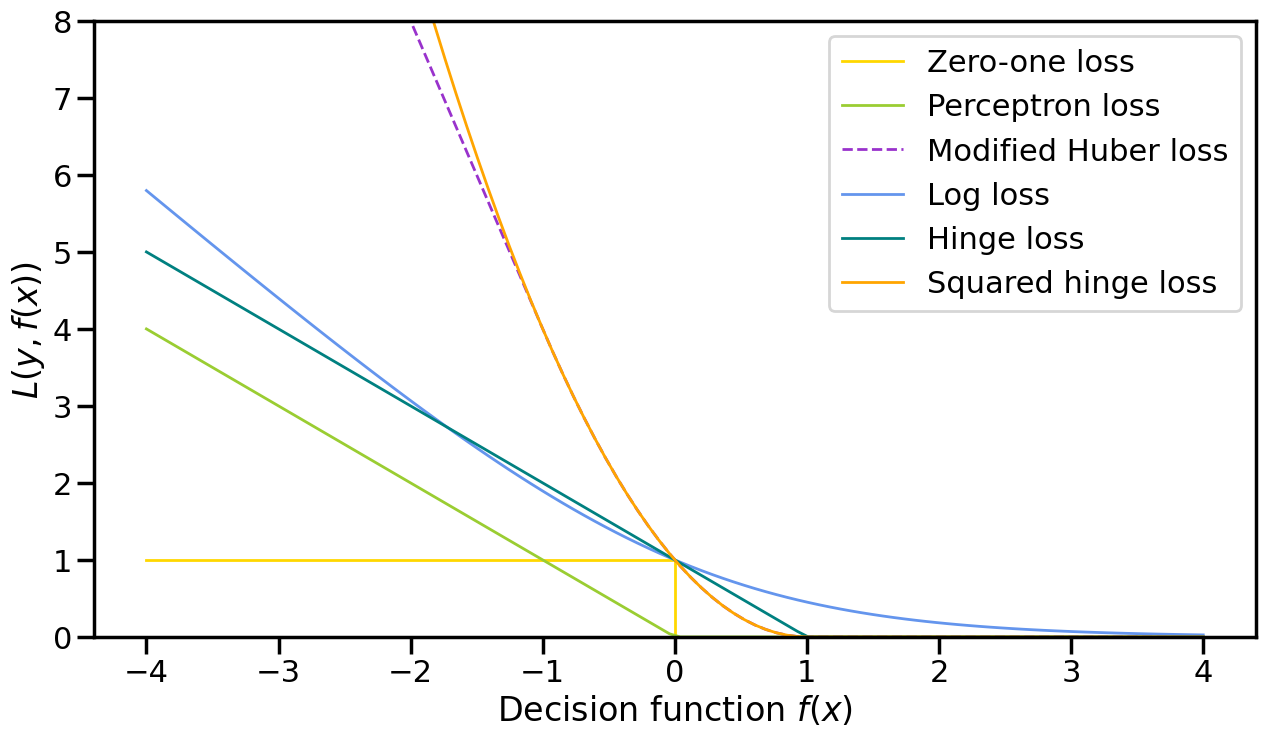

In [17]:
# From: http://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
fig = plt.figure(figsize=(15,8))
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y, f(x))$")
plt.show()

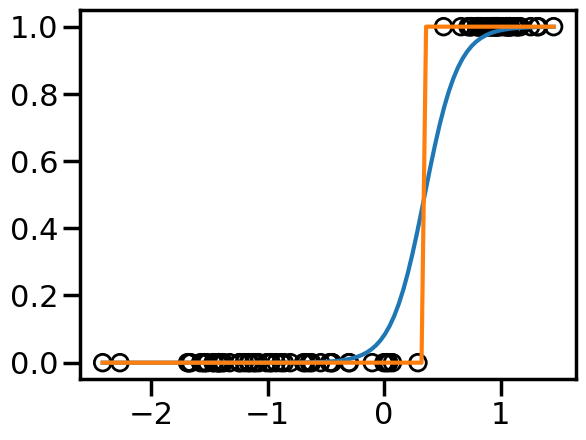

In [18]:
from sklearn.linear_model import SGDClassifier

#loss = 'squared_error'
loss = 'log_loss'
#loss = 'hinge'

model = SGDClassifier(loss=loss, fit_intercept=True, max_iter = 2000,
                     penalty='l2', alpha=.001, epsilon=1, tol=1e-3)
model.fit(X, y)
Xp = np.linspace(X.min(),X.max(),100)
Xp = Xp[:, np.newaxis]
plt.figure()
plt.scatter(X,y,marker='o',facecolors='none',edgecolors='k')
try:
    plt.plot(Xp,model.predict_proba(Xp)[:,1],label='probability')
except:
    pass
plt.plot(Xp,model.predict(Xp))
plt.show()

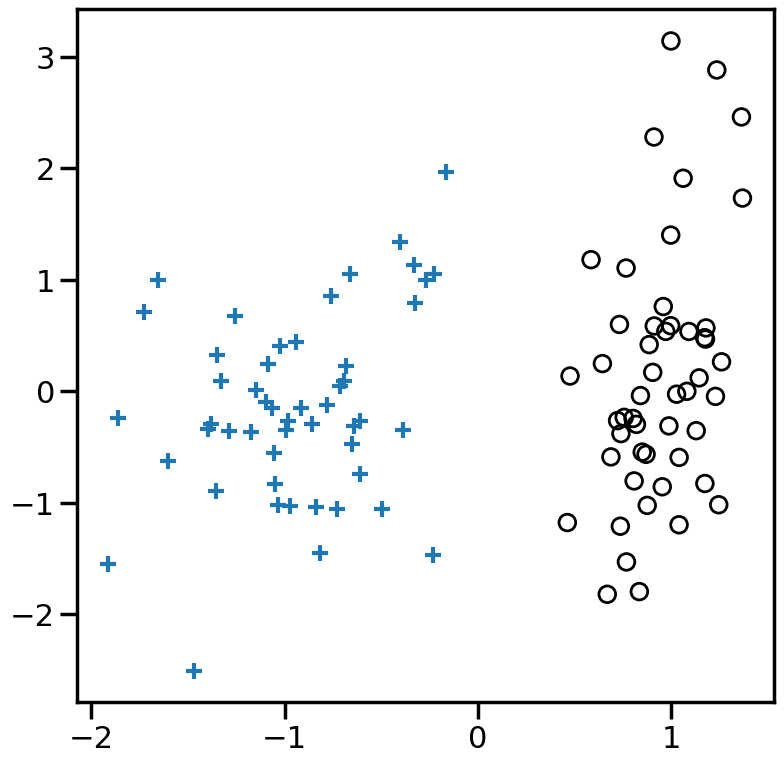

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification


X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2,
                           random_state=1,
                           n_clusters_per_class=1,
                           flip_y=0.0, class_sep=0.7)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

# Change: try 0,1, or 2
ds = datasets[2]

X, y = ds
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(9, 9))
plt.scatter(X[y==1,0],X[y==1,1],marker='+')
plt.scatter(X[y==0,0],X[y==0,1],marker='o',facecolors='none',edgecolors='k')
plt.show()

c:\Users\mafuge\Box Sync\ETHZ\teaching\ML4ME\ML4ME_Textbook\.conda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


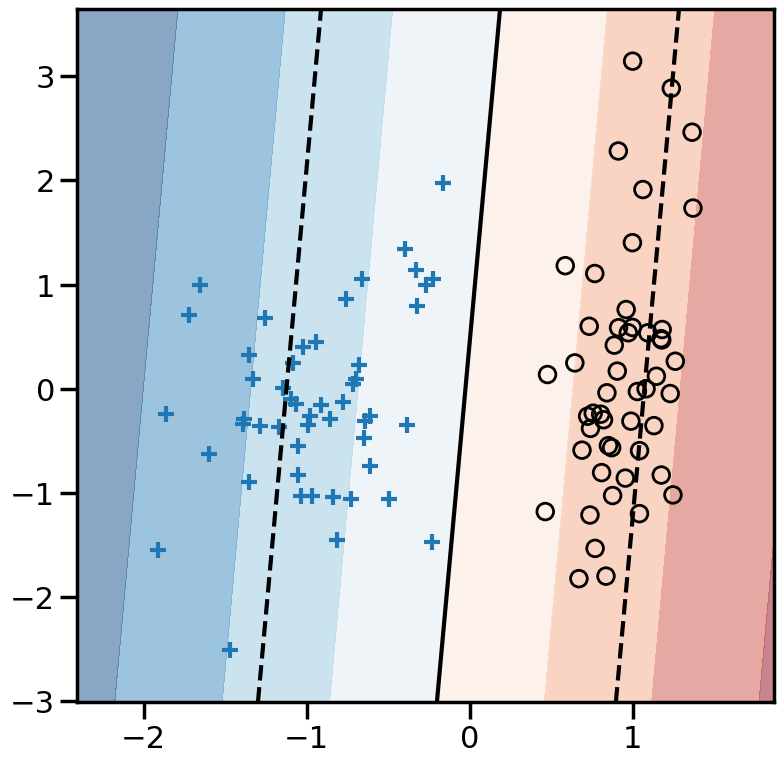

In [20]:
from sklearn.svm import LinearSVC

# Try modifying these:
#====================
loss = 'squared_error'
#loss = 'perceptron'
#loss = 'log_loss'
#loss = 'hinge'
#loss = 'modified_huber'
#loss = 'squared_hinge'

# Also try the effect of Alpha:
# e.g., between ranges 1e-20 and 1e0
#=============================
alpha=1e-3

# You can also try other models by commenting out the below:
model = SGDClassifier(loss=loss, fit_intercept=True,
                      max_iter=200,tol=1e-5, n_iter_no_change =100,
                      penalty='l2',alpha=alpha) 
#model = SGDClassifier(loss = 'hinge')
#model = LinearSVC(loss='hinge',C=1e3)
model.fit(X, y)

plt.figure(figsize=(9, 9))

h=0.01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(model, "decision_function"):
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

vmax = max(abs(Z.min()),abs(Z.max()))
cm = plt.cm.RdBu
plt.contourf(xx, yy, Z, cmap=cm, alpha=.5, vmax = vmax, vmin = -vmax)
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(xx, yy, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[y==1,0],X[y==1,1],marker='+')
plt.scatter(X[y==0,0],X[y==0,1],marker='o',facecolors='none',edgecolors='k')
plt.show()